In [79]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy import stats 

# Study data files
mouse_metadata_path = "/Users/tjeff/Desktop/Matplotlib-/Pymaceuticals/Mouse_metadata.csv"
study_results_path = "/Users/tjeff/Desktop/Matplotlib-/Pymaceuticals/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
data_df = pd.merge(mouse_metadata, study_results, how = 'inner', on='Mouse ID') 
data_df.head()
# Display the data table for preview
data_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [80]:
# Checking the number of mice.
mice = data_df["Mouse ID"].value_counts()
mouse_total=len(mice)
mouse_total

249

In [81]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = data_df.loc[data_df.duplicated(subset=['Mouse ID','Timepoint',]),'Mouse ID'].unique()


In [82]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_id=pd.DataFrame(duplicate_mice)
duplicate_mouse_id


,0
0,g989


In [83]:
# Create a clean DataFrame by dropping duplicate mouse by its ID.
clean_df=data_df[data_df['Mouse ID'].isin(duplicate_mice)==False]

In [84]:
# Checking the number of mice in the clean DataFrame.
clean_mouse=clean_df["Mouse ID"].value_counts()
clean_mice_total=len(clean_mouse)
clean_mice_total 

248

## Summary Statistics

In [85]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen.
stats_summary_df= data_df.groupby('Drug Regimen') 

tumor_mean= stats_summary_df['Tumor Volume (mm3)'].mean()
tumor_median= stats_summary_df['Tumor Volume (mm3)'].median() 
tumor_std= stats_summary_df['Tumor Volume (mm3)'].std()
tumor_sem = stats_summary_df['Tumor Volume (mm3)'].sem() 

summary_group_df = pd.DataFrame({'Mean': tumor_mean, 'Median':tumor_median, 'Standard Deviation': tumor_std, 'SEM':tumor_sem}) 


summary_group_df.head()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe. 




,Mean,Median,Standard Deviation,SEM
Drug Regimen,,,,
Capomulin,40.675741,41.557809,4.994774,0.329346
Ceftamin,52.591172,51.776157,6.268188,0.469821
Infubinol,52.884795,51.820584,6.567243,0.492236
Ketapril,55.235638,53.698743,8.279709,0.603860
Naftisol,54.331565,52.509285,8.134708,0.596466


## Bar and Pie Charts

In [86]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
data_df.columns
# Using the aggregation method, produce the same summary statistics in a single line
data_df.groupby("Drug Regimen").agg({'Tumor Volume (mm3)':['mean','max','std']})


Tumor Volume (mm3)                     
                           mean        max       std
Drug Regimen                                        
Capomulin             40.675741  48.158209  4.994774
Ceftamin              52.591172  68.923185  6.268188
Infubinol             52.884795  72.226731  6.567243
Ketapril              55.235638  78.567014  8.279709
Naftisol              54.331565  76.668817  8.134708
Placebo               54.033581  73.212939  7.821003
Propriva              52.322552  72.455421  6.507770
Ramicane              40.216745  47.622816  4.846308
Stelasyn              54.233149  75.123690  7.710419
Zoniferol             53.236507  73.324432  6.966589

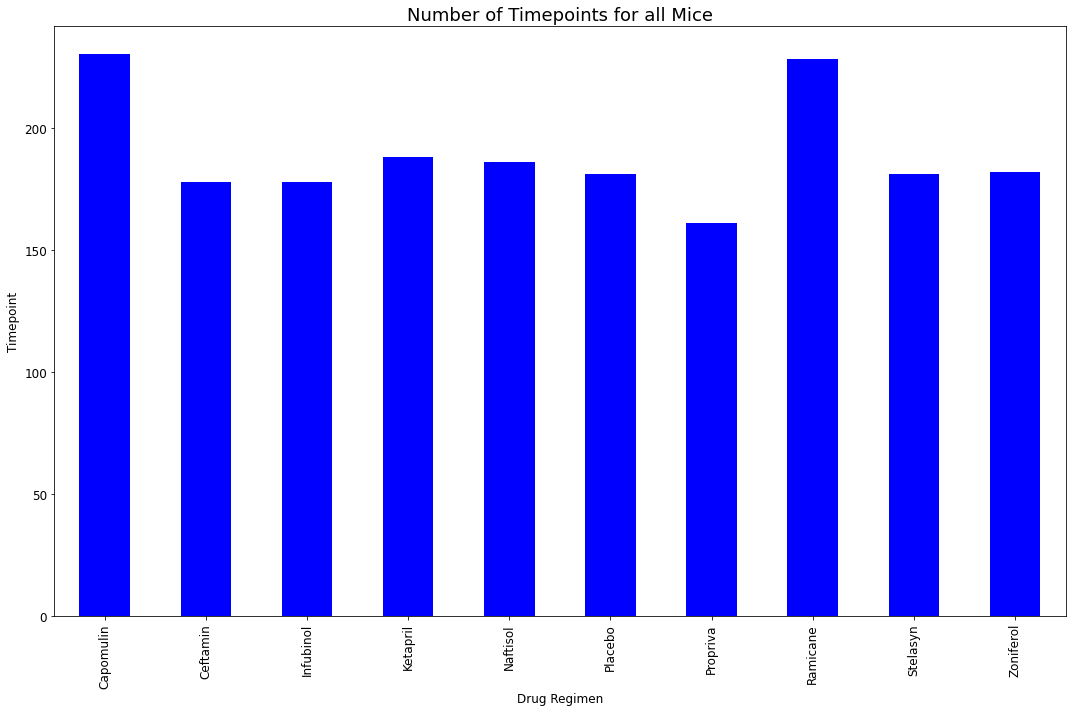

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Timepoint, dtype: int64

In [87]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
mice_per_reg=data_df.groupby(["Drug Regimen"]).count()["Timepoint"]

plot_pandas=mice_per_reg.plot.bar(figsize=(15,10), color='b', fontsize=12)
mice_per_reg
plt.xlabel("Drug Regimen", fontsize=12)
plt.ylabel("Timepoint",fontsize=12)
plt.title("Number of Timepoints for all Mice", fontsize=18)

plt.tight_layout()
plt.show()

mice_per_reg


In [88]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
mice_total= (data_df.groupby(["Drug Regimen"])["Timepoint"].count()).tolist()
mice_total 



[230, 178, 178, 188, 186, 181, 161, 228, 181, 182]

Text(0, 0.5, 'Number of Mice')

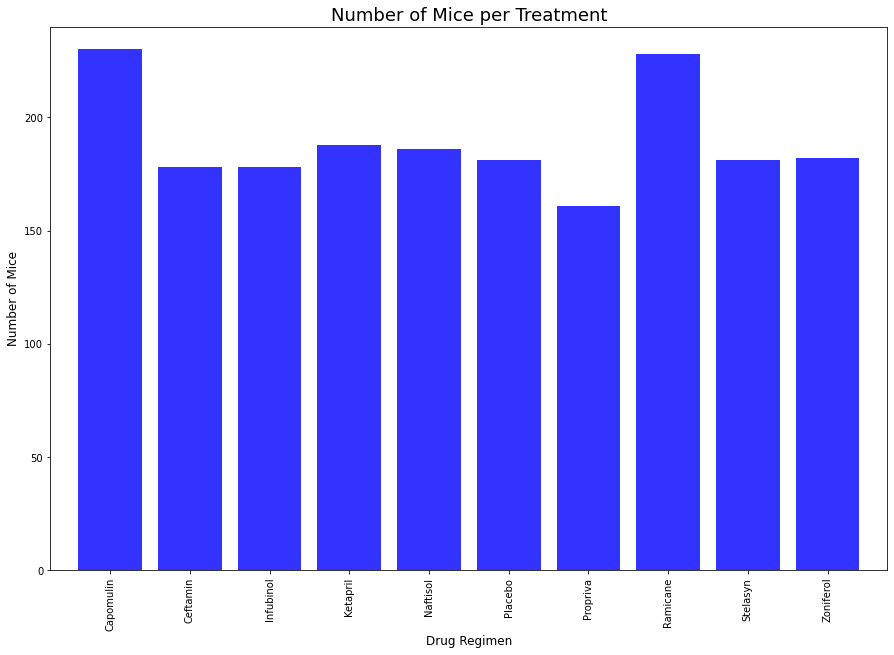

In [90]:
x_axis = np.arange(len(mice_per_reg))
fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.bar(x_axis, mice_total, color='b', alpha=0.8, align='center')

tick_locations = [value for value in x_axis]

plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],  rotation='vertical')

plt.xlim(-0.75, len(x_axis)-0.25)

plt.ylim(0, max(mice_total)+10)

plt.title("Number of Mice per Treatment",fontsize = 18)
plt.xlabel("Drug Regimen",fontsize = 12)
plt.ylabel("Number of Mice",fontsize = 12)

Text(0, 0.5, '')

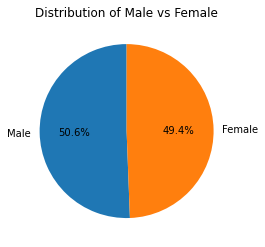

In [91]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
info = data_df['Sex'].value_counts ()
pie_plot = info.plot.pie(autopct="%1.1f%%", startangle=90, title='Distribution of Male vs Female')

pie_plot.set_ylabel('')


<function matplotlib.pyplot.show(close=None, block=None)>

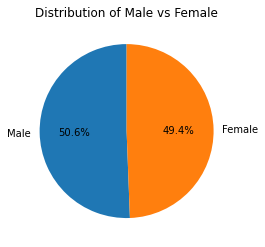

In [92]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
info=data_df['Sex'].value_counts()

plt.pie(info, labels=info.index.values, autopct="%1.1f%%", startangle=90)
plt.title ('Distribution of Male vs Female')

plt.show



## Quartiles, Outliers and Boxplots

In [98]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin 
Capomulin_df = data_df.loc[data_df["Tumor Volume (mm3)"] == "Capomulin",:]
Ramicane_df = data_df.loc[data_df["Tumor Volume (mm3)"] == "Ramicane",:]
Infubinol_df = data_df.loc[data_df["Tumor Volume (mm3)"] == "Infubinol",:]
Ceftamin_df = data_df.loc[data_df["Tumor Volume (mm3)"] == "Ceftamin",:] 
# Start by getting the last (greatest) timepoint for each mouse 
grt_tp_df = pd.DataFrame(data_df.groupby('Mouse ID')['Timepoint'].max().sort_values()).reset_index().rename(columns={'Timepoint': 'greatest_timepoint'})

grt_tp_df



# Merge this group df with the original dataframe to get the tumor volume at the last timepoint 

merge_df=pd.merge(data_df, grt_tp_df, on='Mouse ID')
merge_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,greatest_timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45


In [120]:
 
# Put treatments into a list for for loop (and later for plot labels)
drugs= ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
drug_values = []

# Create empty list to fill with tumor vol data (for plotting) 
empty_list =[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drugs:


    temp_df = merge_df.loc[merge_df['Drug Regimen'] == drug]
 
    final_volume_df = merge_df.loc[merge_df['Timepoint'] == merge_df['greatest_timepoint']]
    
   
    values = final_volume_df['Tumor Volume (mm3)']
    drug_values.append(values)
    
   
    quartiles = values.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f'IQR for {drug}: {iqr}')
    
   
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f'Lower Bound for {drug}: {lower_bound}')
    print(f'Upper Bound for {drug}: {upper_bound}')
    
    
    outliers_count = (values.loc[(final_volume_df['Tumor Volume (mm3)'] >= upper_bound) | 
                                        (final_volume_df['Tumor Volume (mm3)'] <= lower_bound)]).count()
    print(f'Number of {drug} outliers: {outliers_count}')


# Locate the rows which contain mice on each drug and get the tumor volumes



    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

IQR for Capomulin: 19.022849680000007
Lower Bound for Capomulin: 17.400437649999986
Upper Bound for Capomulin: 93.49183637000002
Number of Capomulin outliers: 0
IQR for Ramicane: 19.022849680000007
Lower Bound for Ramicane: 17.400437649999986
Upper Bound for Ramicane: 93.49183637000002
Number of Ramicane outliers: 0
IQR for Infubinol: 19.022849680000007
Lower Bound for Infubinol: 17.400437649999986
Upper Bound for Infubinol: 93.49183637000002
Number of Infubinol outliers: 0
IQR for Ceftamin: 19.022849680000007
Lower Bound for Ceftamin: 17.400437649999986
Upper Bound for Ceftamin: 93.49183637000002
Number of Ceftamin outliers: 0


<function matplotlib.pyplot.show(close=None, block=None)>

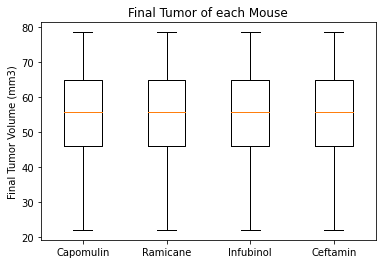

In [127]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
flierprops= dict(marker='o', markerfacecolor='r',markersize=12,markeredgecolor='blue')

plt.boxplot(drug_values, flierprops=flierprops)

plt.title('Final Tumor of each Mouse')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks([1,2,3,4],['Capomulin','Ramicane','Infubinol','Ceftamin'])

plt.show

## Line and Scatter Plots

<function matplotlib.pyplot.show(close=None, block=None)>

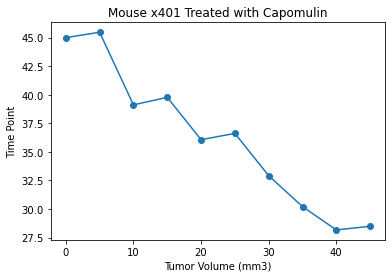

In [130]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mousetreated = data_df.loc[data_df['Mouse ID'] == 'x401']

plt.plot(mousetreated['Timepoint'], mousetreated['Tumor Volume (mm3)'],marker = 'o')

plt.xlabel("Tumor Volume (mm3)")
plt.ylabel("Time Point")
plt.title("Mouse x401 Treated with Capomulin")

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

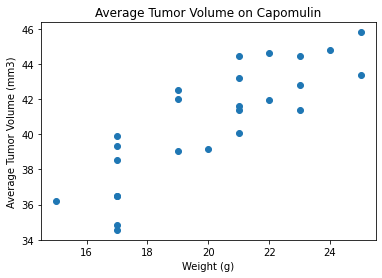

In [133]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
cap_df =data_df.loc [data_df['Drug Regimen'] == 'Capomulin']

avgtum_df = pd.DataFrame(cap_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'Average Tumor Volume'})

avgtum_df=pd.merge(cap_df, avgtum_df, on='Mouse ID')
avg_vol_df= avgtum_df[['Weight (g)', 'Average Tumor Volume']].drop_duplicates()
avg_vol_df

x=avg_vol_df['Weight (g)']
y=avg_vol_df['Average Tumor Volume']

plt.scatter(x,y)

plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume on Capomulin")

plt.show

## Correlation and Regression

In [146]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen 

cap_df=data_df.loc[data_df['Drug Regimen'] == 'Capomulin']
avgtum_df = pd.DataFrame(cap_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={"Tumor Volume (mm3)": "Average Tumor Volume"})
avgtum_df=pd.merge(cap_df, avgtum_df, on='Mouse ID')

avg_vol_df=avgtum_df[['Weight (g)', 'Average Tumor Volume']].drop_duplicates()
avg_vol_df

x = avg_vol_df['Weight (g)']
y = avg_vol_df["Average Tumor Volume"] 

correlation = st.pearsonr(x, y)

print(f"""The correlation coefficient between weight and Average Tumor Volume
on the Capomulin drug is {round(correlation[0],2)}.""") 

(slope, intercept, rvalue, pvalue, stderr) = linregress (x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))



plt.scatter(x,y)
plt.plot(x,reg_values, "r-") 

plt.annotate(line_eq,(20,37), fontsize = 18, color= "green") 

plt.xlabel("Weight (g)") 
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume on the Capomulin Drug")
plt.show()



The correlation coefficient between weight and Average Tumor Volume
on the Capomulin drug is 0.84.


NameError: name 'linregress' is not defined